Problem: Friedman-1 regression

__\<INCLUDE FORMULA\>__

Description: Page 207 DEAP

In [ ]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# used libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

sys.path.append(os.path.join('..', '..'))
import pywinEA2 as pea

pea.USE_NOTEBOOK_ENVIRONMENT = False

In [2]:
def getDataset() -> pd.DataFrame:
    """ Create the testing dataset """
    X, y = datasets.make_friedman1(
        n_samples=200,
        n_features=500,
        noise=0.5,
        random_state=1997)
    
    X = pd.DataFrame(X, columns=['feat_{}'.format(f) for f in range(X.shape[1])])
    y = pd.DataFrame(y, columns=['target'])
    data = pd.concat([X, y], axis=1)
    
    return data

In [3]:
data = getDataset()
data.head(5)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,target
0,0.771148,0.074757,0.526310,0.975088,0.992226,0.465135,0.611135,0.569463,0.667719,0.786780,...,0.802945,0.590838,0.997760,0.690453,0.625186,0.040616,0.574526,0.683321,0.153484,17.082650
1,0.316546,0.457287,0.721017,0.028663,0.623670,0.936549,0.306067,0.131824,0.609781,0.942532,...,0.550755,0.610305,0.391584,0.658611,0.931838,0.056777,0.056389,0.806717,0.348400,9.319051
2,0.973977,0.709694,0.964321,0.618567,0.114940,0.978974,0.456353,0.782813,0.876677,0.678804,...,0.942121,0.912058,0.464577,0.054383,0.792397,0.701524,0.514992,0.993746,0.033966,18.692444
3,0.401484,0.057108,0.925435,0.422867,0.496634,0.769792,0.978067,0.637003,0.091043,0.232143,...,0.090742,0.220962,0.193002,0.703279,0.100004,0.057513,0.394312,0.312684,0.753344,10.495461
4,0.264394,0.797688,0.669919,0.783029,0.347581,0.336558,0.058779,0.632744,0.720600,0.757688,...,0.012301,0.761392,0.118631,0.719180,0.966833,0.435286,0.154155,0.657826,0.465735,15.647972


In [6]:
# create the model
model = KNeighborsRegressor()

# create fitness function
fitness_function = pea.fitness.FeatureSelectionFitness(
    model=model,
    score='mean_squared_error',
    X=data[[c for c in data.columns if c.startswith('feat')]].values,
    y=data['target'],
    X_fixed=None,
    cv=None,
    n_jobs=1
)

100%|█████████████████████████████████████████████████████████████| 200/200 [00:23<00:00,  8.51it/s]


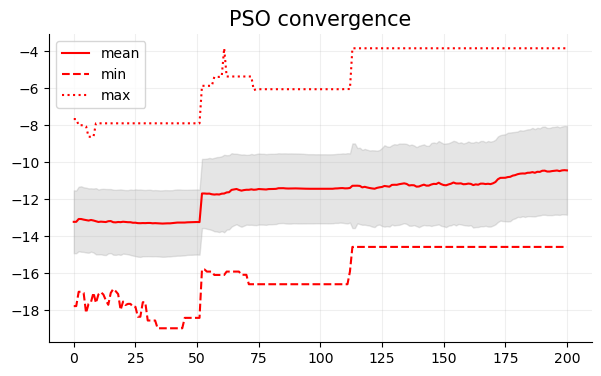

array(['feat_3', 'feat_1', 'feat_0', 'feat_4'], dtype='<U6')

In [39]:
report2, features = pea.pso.vlpso(
    population_size=200,
    num_population_div=20,
    fitness_function=fitness_function,
    max_iterations=200,
    rank_function='pearsonCorrImportance',
    rank_function_kw=dict(task='r'),
    alpha=50,
    beta=50,
    pso_evaluation='binary',
    pso_evaluation_kw=dict(
        invert_objective=True, 
        threshold=0.7,
        n_jobs=8
    ),
    pso_reference_update='simple',
    particle_update='clpso',
    particle_update_kw=dict(
        inertia=0.1,
        acc_const1=0.1,
        acc_const2=0.1,
        clip_values=(0, 1)
    ),
    particle_init_position='random',
    particle_init_position_kw=dict(bounds=(0, 1)),
    particle_init_speed='random',
    report=pea.pso.PSOReport(['min', 'max', 'mean', 'std']),
    verbose=True,
    seed=1997
)
report2.displayConvergence()

np.array(features[:len(report2.particles[0].gbest)])[report2.particles[0].gbest > 0.7]

100%|█████████████████████████████████████████████████████████████| 200/200 [00:34<00:00,  5.73it/s]


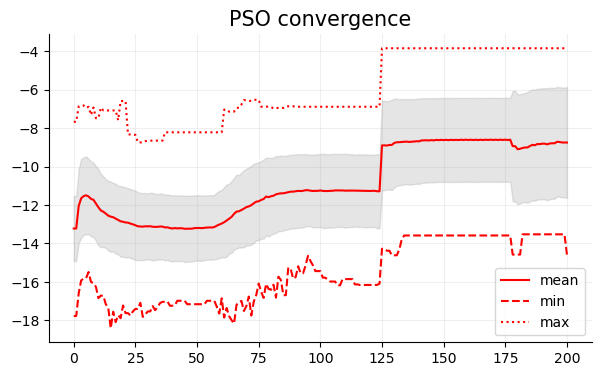

array(['feat_3', 'feat_1', 'feat_0', 'feat_4'], dtype='<U6')

In [54]:
report2, features = pea.pso.vlpso(
    population_size=200,
    num_population_div=20,
    fitness_function=fitness_function,
    max_iterations=200,
    rank_function='pearsonCorrImportance',
    rank_function_kw=dict(task='r'),
    alpha=50,
    beta=50,
    pso_evaluation='binary',
    pso_evaluation_kw=dict(
        invert_objective=True, 
        threshold=0.7,
        n_jobs=8
    ),
    pso_reference_update='simple',
    particle_update='clpso_dynamic_inertia',
    particle_update_kw=dict(
        inertia=0.1,
        acc_const1=0.1,
        acc_const2=0.1,
        clip_values=(0, 1),
        dynamic_inertia_weight=0.5,
    ),
    learning_prob_kw=dict(
        max_prob=0.05),
    particle_init_position='random',
    particle_init_position_kw=dict(bounds=(0, 1)),
    particle_init_speed='random',
    report=pea.pso.PSOReport(['min', 'max', 'mean', 'std']),
    verbose=True,
    seed=1997
)
report2.displayConvergence()

np.array(features[:len(report2.particles[0].gbest)])[report2.particles[0].gbest > 0.7]

In [49]:
np.array(features[:len(report2.particles[0].gbest)])[report2.particles[0].gbest > 0.7].tolist()

['feat_3', 'feat_1', 'feat_0', 'feat_4']

In [53]:
pd.DataFrame(report.history).T

,min,max,mean,std
0,-18.070647,-12.352113,-15.098400,1.149977
1,-18.478704,-11.769954,-14.831434,1.142116
2,-18.053069,-12.210717,-14.716626,1.049730
3,-17.371989,-12.262591,-14.710870,1.054086
4,-16.885059,-12.110211,-14.609763,1.056159
...,...,...,...,...
95,-16.251925,-9.821826,-12.812526,1.307032
96,-16.251925,-9.821826,-12.812526,1.307032
97,-16.251925,-9.821826,-12.817210,1.300746
98,-16.251925,-9.821826,-12.817210,1.300746


100%|█████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.10it/s]


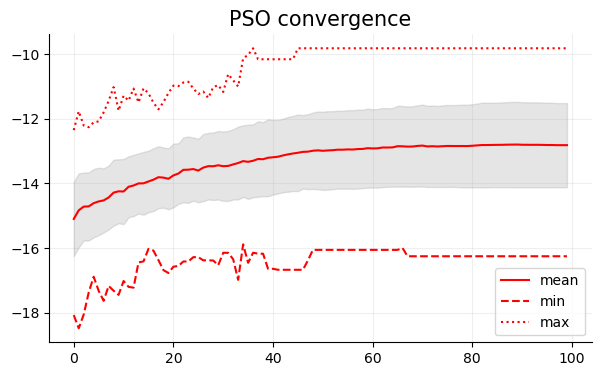

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_7,feat_9,feat_10,feat_12,feat_16,...,feat_483,feat_486,feat_487,feat_488,feat_489,feat_490,feat_493,feat_494,feat_496,feat_498
0,0.771148,0.074757,0.526310,0.975088,0.992226,0.569463,0.786780,0.875238,0.972751,0.559610,...,0.804390,0.930008,0.407438,0.022267,0.619280,0.636205,0.997760,0.690453,0.040616,0.683321
1,0.316546,0.457287,0.721017,0.028663,0.623670,0.131824,0.942532,0.858708,0.740142,0.977963,...,0.555202,0.006734,0.818145,0.891878,0.071766,0.093746,0.391584,0.658611,0.056777,0.806717
2,0.973977,0.709694,0.964321,0.618567,0.114940,0.782813,0.678804,0.324076,0.614634,0.448232,...,0.353632,0.688596,0.928679,0.586979,0.262743,0.725640,0.464577,0.054383,0.701524,0.993746
3,0.401484,0.057108,0.925435,0.422867,0.496634,0.637003,0.232143,0.750862,0.045280,0.475086,...,0.738551,0.525713,0.235264,0.212707,0.032528,0.416850,0.193002,0.703279,0.057513,0.312684
4,0.264394,0.797688,0.669919,0.783029,0.347581,0.632744,0.757688,0.272658,0.653196,0.577086,...,0.665693,0.854268,0.358805,0.526585,0.603104,0.344319,0.118631,0.719180,0.435286,0.657826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.511195,0.810895,0.884341,0.354984,0.693024,0.435777,0.118464,0.693776,0.411447,0.710611,...,0.580143,0.711741,0.458923,0.450548,0.544326,0.523620,0.409383,0.647247,0.921545,0.288371
196,0.970550,0.194893,0.723479,0.725414,0.922141,0.732425,0.325691,0.649353,0.723304,0.214725,...,0.412123,0.821017,0.792264,0.332006,0.720896,0.811215,0.163279,0.259660,0.483858,0.618837
197,0.518127,0.653751,0.948619,0.158353,0.165143,0.696062,0.324912,0.714681,0.479958,0.726042,...,0.211300,0.424694,0.895641,0.706307,0.242233,0.557964,0.496983,0.549166,0.179761,0.407582
198,0.962428,0.560528,0.256671,0.985888,0.585828,0.602856,0.103225,0.669356,0.691368,0.794974,...,0.500752,0.848221,0.479063,0.798942,0.919589,0.049015,0.207895,0.792245,0.857927,0.944848


In [42]:
report = pea.pso.psoSimple(
    population_size=200,
    fitness_function=fitness_function,
    max_iterations=100,
    pso_evaluation='binary',
    pso_evaluation_kw=dict(
        invert_objective=True, 
        threshold=0.7,
        n_jobs=15
    ),
    pso_reference_update='simple',
    particle_update='simple_dynamic_inertia',
    particle_update_kw=dict(
        inertia=0.2,
        acc_const1=0.1,
        acc_const2=0.2,
        clip_values=(0, 1),
        dynamic_inertia_weight=0.5,
        
    ),
    particle_init_position='random',
    particle_init_speed='random',
    report=pea.pso.PSOReport(['min', 'max', 'mean', 'std']),
    verbose=True,
    seed=1997   
)
report.displayConvergence()
data[[c for c in data.columns if c.startswith('feat')]].iloc[:, report.particles[0].gbest > 0.7]

In [ ]:
report2, features = pea.pso.vlpso(
    population_size=100,
    num_population_div=5,
    fitness_function=fitness_function,
    max_iterations=200,
    rank_function='mutualInformationImportance',
    rank_function_kw=dict(task='r'),
    alpha=10,
    beta=25,
    pso_evaluation='binary',
    pso_evaluation_kw=dict(
        invert_objective=True, 
        threshold=0.0,
        n_jobs=15
    ),
    pso_reference_update='simple',
    particle_update_kw=dict(
        inertia=0.2,
        acc_const1=0.2,
        acc_const2=0.1,
        clip_values=(-1, 2)
    ),
    particle_init_position='random',
    particle_init_position_kw=dict(bounds=(-1, 1)),
    particle_init_speed='random',
    report=pea.pso.PSOReport(['min', 'max', 'mean', 'std']),
    verbose=True,
    seed=1997
)

In [ ]:
report2.displayConvergence()

In [ ]:
np.array(features[:len(report2.particles[0].gbest)])[report2.particles[0].gbest > 0.0]